In [1]:
import os
import cv2
import sys
import time
import pickle
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

Using TensorFlow backend.


In [2]:
PROGRAM_PATH = os.path.abspath("..")
if PROGRAM_PATH not in sys.path:
    sys.path.append(PROGRAM_PATH)

In [3]:
from Helpers.GeneralHelpers import *
from Helpers.RHDHelpers import *
from DataHandling.PreProcessing import *
from Model.PoolingAndFire import create_loss_function

In [4]:
MODEL_FILE = os.path.expanduser("~/results/SVPGestureRec/all_points_promising.h5py")
#MODEL_FILE = os.path.expanduser("~/results/SqueezeDet/all_points_complete_run_09.h5py")
#MODEL_FILE = os.path.expanduser("~/results/SVPGestureRec/all_points_overfit_32.h5py")
RHD_ANNOTATIONS_FILE = os.path.expanduser("~/datasets/RHD/RHD_published_v2/training/anno_training.pickle")
VALIDATION_DIR = os.path.expanduser("~/datasets/RHD/processed/validation")
TRAIN_DIR = os.path.expanduser("~/datasets/RHD/processed/train")
VALIDATION_ANNOTATIONS = os.path.expanduser("~/datasets/RHD/processed/validation/annotations/")
TRAIN_ANNOTATIONS = os.path.expanduser("~/datasets/RHD/processed/train/annotations/")

In [5]:
create_rhd_annotations(RHD_ANNOTATIONS_FILE,
                       VALIDATION_ANNOTATIONS,
                       VALIDATION_DIR,
                       fingers='ALL',
                       hands_to_annotate='BOTH',
                       annotate_non_visible=False,
                       force_new_files=True)

100%|██████████| 413/413 [00:00<00:00, 4409.86it/s]

Creating annotations in directory: /home/clh/datasets/RHD/processed/validation
Using annotation file: /home/clh/datasets/RHD/RHD_published_v2/training/anno_training.pickle
And outputting to: /home/clh/datasets/RHD/processed/validation/annotations/


In [6]:
BATCHSIZE = 16
EPSILON = 1e-16

LABEL_WEIGHT = 1.0
OFFSET_LOSS_WEIGHT = 1.0
OFFSET_SCALE = int(320 / 20)

NUM_CLASSES = 42
NUM_HANDS = 2

l = create_loss_function(20,
                         20,
                         LABEL_WEIGHT,
                         OFFSET_SCALE,
                         OFFSET_LOSS_WEIGHT,
                         NUM_CLASSES,
                         EPSILON,
                         BATCHSIZE)

In [7]:
model = load_model(MODEL_FILE, custom_objects={'loss_function': l})

In [8]:
samples_dir = VALIDATION_DIR
annotations_dir = VALIDATION_ANNOTATIONS
NUM_SAMPLES_TO_CHECK = BATCHSIZE

In [9]:
#samples_to_check = []
#for fi in os.listdir(samples_dir):
#    if fi.endswith('png'):
#        samples_to_check.append(int(fi.split('.')[0]))
#        if len(samples_to_check) >= NUM_SAMPLES_TO_CHECK:
#            break

#print(samples_to_check)

In [10]:
samples = np.array(get_all_samples(samples_dir, sample_type='png'))
ind = np.random.randint(0, len(samples), size=NUM_SAMPLES_TO_CHECK)
samples_to_check = samples[ind]
print(samples_to_check)

[40861 40885 41173 41191 41148 40917 40981 41000 41071 40995 41181 41156
 41074 41167 41115 41130]


In [11]:
labels, images = load_data_with_anchors(samples_to_check,
                                        samples_dir,
                                        annotations_dir,
                                        320, 320,
                                        20, 20,
                                        OFFSET_SCALE,
                                        'png',
                                        num_classes=NUM_CLASSES,
                                        greyscale=True)

images_show = np.zeros((len(images), 320, 320, 3), dtype=np.uint8)
for c, im in enumerate(images):
    #images_show[c] = cv2.cvtColor((im * 255.0).astype(np.uint8), cv2.COLOR_BGR2RGB)
    images_show[c][:, :, 0] = im.reshape(320, 320) * 255.0
    images_show[c][:, :, 1] = im.reshape(320, 320) * 255.0
    images_show[c][:, :, 2] = im.reshape(320, 320) * 255.0

print(np.max(images[0]))

0.7176470588235294


In [12]:
for l in labels:
    print(l.shape)
    for i in range(NUM_CLASSES):
        offset_xs = l[:, :, NUM_CLASSES+i*2]
        offset_ys = l[:, :, NUM_CLASSES+1+i*2]
        
        print(f"Offset max x: {np.max(offset_xs)}")
        print(f"Offset max y: {np.max(offset_ys)}")
        print("")

(20, 20, 126)
Offset max x: 0.13000011444091797
Offset max y: 0.0

Offset max x: 0.04187488555908203
Offset max y: 0.0

Offset max x: 0.0
Offset max y: 0.0

Offset max x: 0.5762500762939453
Offset max y: 0.0

Offset max x: 0.04250001907348633
Offset max y: 0.0

Offset max x: 0.04374980926513672
Offset max y: 0.71875

Offset max x: 0.21875
Offset max y: 0.5874996185302734

Offset max x: 0.5625
Offset max y: 0.5687503814697266

Offset max x: 0.8187503814697266
Offset max y: 0.7437496185302734

Offset max x: 0.0774998664855957
Offset max y: 0.8999996185302734

Offset max x: 0.16249990463256836
Offset max y: 0.10624980926513672

Offset max x: 0.6475000381469727
Offset max y: 0.16250038146972656

Offset max x: 0.6468749046325684
Offset max y: 0.19375038146972656

Offset max x: 0.16375017166137695
Offset max y: 0.15625

Offset max x: 0.18062496185302734
Offset max y: 0.23124980926513672

Offset max x: 0.341249942779541
Offset max y: 0.2624998092651367

Offset max x: 0.41750001907348633
Offse


Offset max x: 0.6750001907348633
Offset max y: 0.04374980926513672

Offset max x: 0.34375
Offset max y: 0.30624961853027344

Offset max x: 0.03750038146972656
Offset max y: 0.3125

Offset max x: 0.59375
Offset max y: 0.04374980926513672

Offset max x: 0.5562496185302734
Offset max y: 0.8999996185302734

Offset max x: 0.75
Offset max y: 0.71875

Offset max x: 0.5062503814697266
Offset max y: 0.8625001907348633

Offset max x: 0.04374980926513672
Offset max y: 0.5249996185302734

Offset max x: 0.11874961853027344
Offset max y: 0.5062503814697266

Offset max x: 0.41250038146972656
Offset max y: 0.23750019073486328

Offset max x: 0.8874998092651367
Offset max y: 0.19999980926513672

Offset max x: 0.3312501907348633
Offset max y: 0.8812503814697266

Offset max x: 0.53125
Offset max y: 0.875

Offset max x: 0.0
Offset max y: 0.0

Offset max x: 0.0
Offset max y: 0.0

Offset max x: 0.0
Offset max y: 0.0

Offset max x: 0.0
Offset max y: 0.0

Offset max x: 0.0
Offset max y: 0.0

Offset max x: 0.0

In [13]:
right_hand = []
left_hand = []

with open(RHD_ANNOTATIONS_FILE, 'rb') as f:
    annotations = pickle.load(f)
    
for s in samples_to_check:
    right_hand.append(get_right_hand(s, annotations))
    left_hand.append(get_left_hand(s, annotations))

In [14]:
res = np.zeros(labels.shape)
process_times = []
for c, im in enumerate(images):
    before = time.time()
    #res.append(model.predict(im.reshape(1, 320, 320, 1)))
    res[c] = model.predict(im.reshape(1, 320, 320, 1))
    process_times.append(time.time() - before)
    
process_times = np.array(process_times)
print(f"Average processing time: {np.mean(process_times)}")
print(f"Max processing time: {np.max(process_times)}")
print(f"Min processing time: {np.min(process_times)}")
print(f"Average processing time excepting first: {np.mean(process_times[1:])}")

Average processing time: 0.16907593607902527
Max processing time: 2.3024754524230957
Min processing time: 0.025005102157592773
Average processing time excepting first: 0.02684930165608724


In [15]:
for c, l in enumerate(labels):
    for i in range(NUM_CLASSES):
        finger_index = i
        if finger_index >= 21:
            finger_index -= 21
        
        single_label = np.zeros((20, 20, 3))
        single_label[:, :, 0] = labels[c, :, :, i]
        single_label[:, :, 1] = labels[c, :, :, NUM_CLASSES+i*2]
        single_label[:, :, 2] = labels[c, :, :, NUM_CLASSES+1+i*2]
        
        anchors = get_anchors(320, 320, 20, 20)

        label_points = get_all_points_from_prediction(single_label,
                                                      anchors,
                                                      threshold=1.0,
                                                      offset_weight=OFFSET_SCALE)
        
        x_points = np.zeros(len(label_points))
        y_points = np.zeros(len(label_points))
        for counter, p in enumerate(label_points):
            #x = p[0] + p[2]
            #y = p[1] + p[3]
            x_points[counter] = p[0] + p[2]
            y_points[counter] = p[1] + p[2]
        
        if len(label_points) > 0:
            x = np.mean(x_points)
            y = np.mean(y_points)

            print(f"{FINGER_MAP_INV[finger_index]}: ({x:.2f}, {y:.2f}), anchor point: ({p[0]:.2f}, {p[1]:.2f}), offset: ({p[2]:.2f}, {p[3]:.2f})")

            cv2.circle(images_show[c], (int(x), int(y)), 1, (0, 255, 0), thickness=2)

Wrist: (78.08, 17.08), anchor point: (76.00, 15.00), offset: (2.08, -11.61)
Thumb1: (76.67, 8.17), anchor point: (91.00, 15.00), offset: (-14.33, -4.61)
Thumb2: (70.47, 9.47), anchor point: (76.00, 15.00), offset: (-5.53, -14.53)
Thumb3: (69.22, 16.22), anchor point: (76.00, 15.00), offset: (-6.78, -9.79)
Thumb4: (60.68, 15.68), anchor point: (60.00, 15.00), offset: (0.68, -14.34)
Index1: (106.70, 188.37), anchor point: (121.00, 198.00), offset: (-14.30, -4.50)
Index2: (124.50, 170.00), anchor point: (137.00, 182.00), offset: (-12.50, -5.60)
Index3: (130.00, 160.50), anchor point: (137.00, 167.00), offset: (-7.00, -5.90)
Index4: (134.10, 149.43), anchor point: (137.00, 152.00), offset: (-2.90, -3.10)
Middle1: (92.24, 188.91), anchor point: (106.00, 198.00), offset: (-13.76, -1.60)
Middle2: (78.60, 184.93), anchor point: (91.00, 182.00), offset: (-12.40, 1.70)
Middle3: (70.36, 171.69), anchor point: (76.00, 182.00), offset: (-5.64, -12.40)
Middle4: (86.35, 162.35), anchor point: (91.00,

Wrist: (127.80, 119.80), anchor point: (137.00, 121.00), offset: (-9.20, 0.50)
Thumb1: (182.20, 117.20), anchor point: (198.00, 121.00), offset: (-15.80, -2.40)
Thumb2: (172.50, 111.50), anchor point: (182.00, 121.00), offset: (-9.50, -2.60)
Thumb3: (159.80, 113.80), anchor point: (167.00, 121.00), offset: (-7.20, -7.60)
Thumb4: (143.20, 112.20), anchor point: (152.00, 121.00), offset: (-8.80, -4.90)
Index1: (177.50, 132.00), anchor point: (182.00, 137.00), offset: (-4.50, -5.40)
Index2: (183.50, 127.83), anchor point: (198.00, 137.00), offset: (-14.50, -3.50)
Index3: (179.80, 134.30), anchor point: (182.00, 137.00), offset: (-2.20, -7.00)
Index4: (166.50, 130.83), anchor point: (167.00, 137.00), offset: (-0.50, -11.90)
Middle1: (171.20, 141.20), anchor point: (182.00, 137.00), offset: (-10.80, 0.40)
Middle2: (178.10, 148.10), anchor point: (182.00, 152.00), offset: (-3.90, -9.90)
Middle3: (175.60, 145.60), anchor point: (182.00, 152.00), offset: (-6.40, -12.50)
Middle4: (163.20, 132.8

Thumb4: (174.60, 113.60), anchor point: (182.00, 121.00), offset: (-7.40, -3.20)
Index1: (196.60, 112.10), anchor point: (198.00, 121.00), offset: (-1.40, -7.50)
Index2: (178.70, 102.70), anchor point: (182.00, 106.00), offset: (-3.30, -0.70)
Index3: (150.40, 135.07), anchor point: (152.00, 137.00), offset: (-1.60, -4.30)
Index4: (170.20, 129.87), anchor point: (182.00, 137.00), offset: (-11.80, -4.10)
Middle1: (193.10, 132.10), anchor point: (198.00, 137.00), offset: (-4.90, -5.50)
Middle2: (183.80, 119.05), anchor point: (198.00, 121.00), offset: (-14.20, 0.80)
Middle3: (156.40, 125.90), anchor point: (167.00, 137.00), offset: (-10.60, -6.90)
Middle4: (167.10, 140.85), anchor point: (182.00, 137.00), offset: (-14.90, 2.50)
Ring1: (185.10, 139.60), anchor point: (198.00, 152.00), offset: (-12.90, -7.10)
Ring2: (182.80, 127.13), anchor point: (198.00, 137.00), offset: (-15.20, -3.60)
Ring3: (158.90, 143.90), anchor point: (167.00, 152.00), offset: (-8.10, -2.70)
Ring4: (171.10, 156.10)

In [16]:
THRESHOLD = 0.9

for c, r in enumerate(res):
    #print(r.shape)
    #pred = r.reshape(20, 20, 3)
    
    for i in range(NUM_CLASSES):
        
        finger_index = i
        if finger_index >= 21:
            finger_index -= 21
        
        pred = np.zeros((20, 20, 3))
        
        pred[:, :, 0] = res[c, :, :, i]
        pred[:, :, 1] = res[c, :, :, NUM_CLASSES+i*2]
        pred[:, :, 2] = res[c, :, :, NUM_CLASSES+1+i*2]
        
        #print(np.max(pred[:, :, 0]))
        
        anchors = get_anchors(320, 320, 20, 20)
        max_val = np.max(pred[:,:,0])
        #max_val = 0.9
        pred_point = get_all_points_from_prediction(pred,
                                                    anchors,
                                                    threshold=max_val*0.9,
                                                    offset_weight=OFFSET_SCALE,
                                                    is_label=False)
        
        # Find a way to handle outliers
        x_points = np.zeros(len(pred_point))
        y_points = np.zeros(len(pred_point))
        for counter, p in enumerate(pred_point):
            #x = p[0] + p[2]
            #y = p[1] + p[3]
            x_points[counter] = p[0] + p[2]
            y_points[counter] = p[1] + p[2]
        
        x = np.mean(x_points)
        y = np.mean(y_points)
        
        print(f"{FINGER_MAP_INV[finger_index]}  Predicted point: ({x}, {y}), confidence: {max_val}")

        cv2.circle(images_show[c], (int(x), int(y)), 1, (255, 0, 0), thickness=1)

Wrist  Predicted point: (133.26812744140625, 72.26812744140625), confidence: 0.43238428235054016
Thumb1  Predicted point: (210.3507890701294, 179.3507890701294), confidence: 0.8047797679901123
Thumb2  Predicted point: (204.23131847381592, 173.23131847381592), confidence: 0.07819686830043793
Thumb3  Predicted point: (76.3698616027832, 137.3698616027832), confidence: 0.018083449453115463
Thumb4  Predicted point: (77.54905891418457, 16.54905891418457), confidence: 0.007742198649793863
Index1  Predicted point: (160.1491641998291, 205.6491641998291), confidence: 0.6800546646118164
Index2  Predicted point: (91.49785614013672, 228.49785614013672), confidence: 0.30192142724990845
Index3  Predicted point: (107.06306648254395, 229.06306648254395), confidence: 0.03310522064566612
Index4  Predicted point: (137.5481457710266, 84.54814577102661), confidence: 0.0009101913892664015
Middle1  Predicted point: (149.70028829574585, 195.20028829574585), confidence: 0.5321463346481323
Middle2  Predicted poi

Pinky3  Predicted point: (99.53109383583069, 206.5310938358307), confidence: 0.989428699016571
Pinky4  Predicted point: (116.67057681083679, 200.9205768108368), confidence: 0.9898291230201721
Wrist  Predicted point: (226.97940635681152, 89.97940635681152), confidence: 0.002763429656624794
Thumb1  Predicted point: (246.48550510406494, 116.48550510406494), confidence: 0.013403325341641903
Thumb2  Predicted point: (239.48724746704102, 117.48724746704102), confidence: 0.00017191919323522598
Thumb3  Predicted point: (275.71943950653076, 70.21943950653076), confidence: 1.162956868938636e-05
Thumb4  Predicted point: (238.7687816619873, 86.7687816619873), confidence: 9.174290607916191e-05
Index1  Predicted point: (254.3385419845581, 116.3385419845581), confidence: 0.1041439026594162
Index2  Predicted point: (251.23688888549805, 113.23688888549805), confidence: 0.02665165811777115
Index3  Predicted point: (248.61451387405396, 110.61451387405396), confidence: 0.0022109488490968943
Index4  Predic

Ring3  Predicted point: (26.153307914733887, 11.153307914733887), confidence: 4.580838776746532e-06
Ring4  Predicted point: (29.086173057556152, 14.086173057556152), confidence: 2.202512405347079e-05
Pinky1  Predicted point: (2.105982780456543, 124.10598278045654), confidence: 0.004468314349651337
Pinky2  Predicted point: (0.6442391872406006, 106.6442391872406), confidence: 0.00012289213191252202
Pinky3  Predicted point: (0.5077277421951294, 106.50772774219513), confidence: 7.845561049180105e-05
Pinky4  Predicted point: (136.263108253479, 303.263108253479), confidence: 0.0005255647702142596
Wrist  Predicted point: (176.22283013661703, 115.22283013661702), confidence: 0.9708384275436401
Thumb1  Predicted point: (169.1534090836843, 215.1534090836843), confidence: 0.9980490207672119
Thumb2  Predicted point: (166.39041233062744, 189.39041233062744), confidence: 0.9990023970603943
Thumb3  Predicted point: (165.87096881866455, 173.37096881866455), confidence: 0.9984617233276367
Thumb4  Predi

In [20]:
def confidence_score(label, prediction, num_classes):
    """
    How often does the model tag the correct anchor.
    """
    error = 0
    for i in range(num_classes):
        l = label[:, :, i]
        p = prediction[:, :, i]
        
        label_x, label_y = np.where(l==1.0)
        try:
            label_point = np.array([label_x[0], label_y[0]])
            print(f"label_point: {label_point}")
        except:
            #print("Error")
            continue

        prediction_x, prediction_y = np.where(p==np.max(p))
        prediction_point = np.array([prediction_x[0], prediction_y[0]])
        
        print(f"prediction_point: {prediction_point}")
        
        label_error = np.linalg.norm(label_point - prediction_point)
        error += label_error
        print(label_error)
        
        print("")
    
    return error

#print(res.shape)
confidence_score(labels[0], res[0], 42)

label_point: [4 0]
prediction_point: [8 4]
5.656854249492381

label_point: [4 0]
prediction_point: [13 11]
14.212670403551895

label_point: [4 0]
prediction_point: [13 11]
14.212670403551895

label_point: [3 0]
prediction_point: [4 8]
8.06225774829855

label_point: [3 0]
prediction_point: [4 0]
1.0

label_point: [ 6 11]
prediction_point: [ 5 15]
4.123105625617661

label_point: [ 7 10]
prediction_point: [ 5 14]
4.47213595499958

label_point: [7 9]
prediction_point: [ 6 14]
5.0990195135927845

label_point: [7 9]
prediction_point: [9 5]
4.47213595499958

label_point: [ 5 11]
prediction_point: [14 10]
9.055385138137417

label_point: [ 4 11]
prediction_point: [ 4 14]
3.0

label_point: [ 3 10]
prediction_point: [ 4 14]
4.123105625617661

label_point: [4 9]
prediction_point: [5 8]
1.4142135623730951

label_point: [ 5 13]
prediction_point: [ 4 14]
1.4142135623730951

label_point: [ 4 12]
prediction_point: [ 4 14]
2.0

label_point: [ 3 11]
prediction_point: [5 8]
3.605551275463989

label_point:

117.08985123249356

In [18]:
def accuracy():
    pass

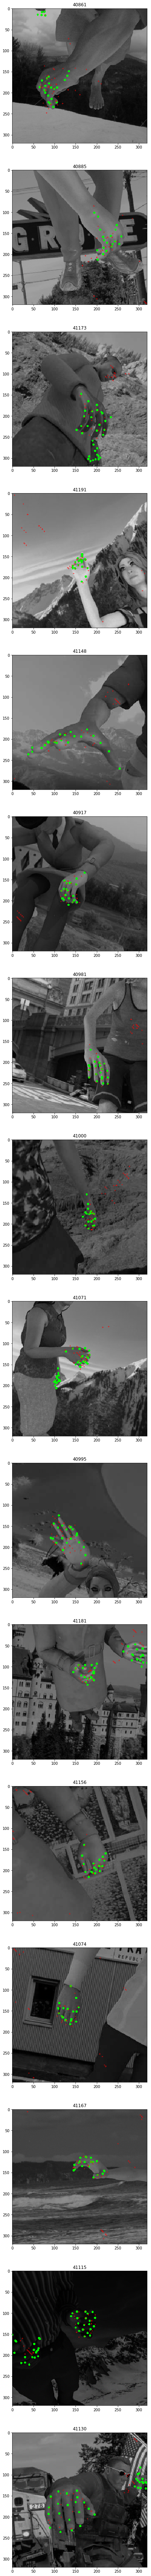

In [19]:
f, subs = plt.subplots(len(images_show), 1, figsize=(15, 8*len(samples_to_check)))
for c, im in enumerate(images_show):
    subs[c].imshow(im)
    #subs[c].set_title(f"Confidence: {np.max(res[c][:,:,:,0])}")
    subs[c].set_title(f"{samples_to_check[c]}")

#f = plt.figure(figsize=(20, 20))
#plt.imshow(images_show[0], cmap='gray')